CIC Seminar Demo - Spurious Regression
=================
This notebook provides a simple simulation routine to demonstrate spurious regression when both the dependent and explanatory variables contain unit roots. 

Import the necessary libraries

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as statm
import statsmodels.formula.api as statmf
%matplotlib inline

Simulate four unit root processes, two with drifts, two without drifts. Specifically, 
$$Y_t = \alpha + y_{t-1} + \varepsilon_t$$

$$Y^1_t = y^1_{t-1} + \varepsilon^1_t$$

with $Y_t = \left (y_t, x_t \right )'$ and $Y^1_t = \left (y^1_t, x^1_t\right )'$. Note that the $\varepsilon_t$ and $\varepsilon^1_t$ are drawn from NID(0,$I$) random varaibles, with initial values being 0. So there is no reasons why they should be correlated. 
We do this by first defining a function that will simulate the data. 


In [9]:
def simulate_uroot(T):
    e = sps.norm.rvs(size=(T,2))
    y = np.zeros((T+1,2))
    y1 = np.zeros((T+1,2))
    a = [0.3, 0.4]
    for t in range(1,T+1):
        y[t] =a + y[t-1] + e[t-1]
        y1[t] = y1[t-1] + e[t-1]
    return y,y1

Then we call the function - this allows us to change sample size, T. 

In [15]:
T=1000
y,y1 = simulate_uroot(T)

We now put the simulated data into a dataframe, called m. 
Let's plot some graphs. 

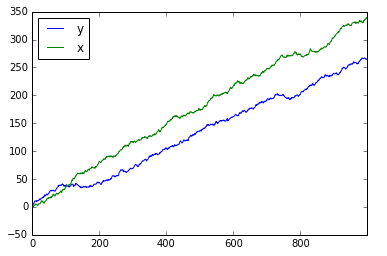

In [11]:
m = pd.DataFrame(np.c_[y[1:T+1],y1[1:T+1],e], columns=['y','x','y1','x1', 'ey', 'ex'])
m[['y','x']].plot()

First take a look at the correlation between the error terms. They are not exactly 0 but close enough...

In [16]:
elabel = ['ey', 'ex']
m[elabel].corr()

,ey,ex
ey,1.000000,-0.056631
ex,-0.056631,1.000000


Now we regress $y$ with $x$, not that both $y$ and $x$ are generated as unit roots with drift but their random components are not correlated. 

In [17]:
result = statmf.ols('y~1+x', data=m).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 5.906e+04
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:37:42   Log-Likelihood:                -3708.8
No. Observations:                1000   AIC:                             7422.
Df Residuals:                     998   BIC:                             7431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.7691      0.649     -8.891      0.000        -7.042    -4.496
x              0.7840      0.003    243.016      0.000         0.778     0.790
==============================================================================
Omnibus:                       32.482   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.178
Skew:                           0.314   Prob(JB):                     2.07e-06
Kurtosis:                       2.517   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Repeat the same process for the two varaibles generated without the drift terms

In [18]:
y1label=['y1', 'x1']
m[y1label].corr()

,y1,x1
y1,1.000000,0.725721
x1,0.725721,1.000000


In [19]:
result_nodrift = statmf.ols('y1~1+x1', data=m).fit()
result_nodrift.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1110.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          2.80e-164
Time:                        15:38:19   Log-Likelihood:                -3559.2
No. Observations:                1000   AIC:                             7122.
Df Residuals:                     998   BIC:                             7132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.9706      0.420    -16.590      0.000        -7.795    -6.146
x1             0.4492      0.013     33.324      0.000         0.423     0.476
==============================================================================
Omnibus:                       81.159   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.407
Skew:                           0.740   Prob(JB):                     2.59e-22
Kurtosis:                       3.441   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""